![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Homomorphic Filtering in Image Processing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
from   scipy.fftpack     import fft2,ifft2,fftshift,ifftshift
from   scipy.ndimage     import gaussian_filter
from   scipy.signal      import fftconvolve

# Read the PET image

In [ ]:
!wget https://www.dropbox.com/s/j3m1a1ffvm6e98l/pet.png

--2023-10-12 10:34:14--  https://www.dropbox.com/s/j3m1a1ffvm6e98l/pet.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/j3m1a1ffvm6e98l/pet.png [following]
--2023-10-12 10:34:14--  https://www.dropbox.com/s/raw/j3m1a1ffvm6e98l/pet.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb18d2262a54d104396e249448c.dl.dropboxusercontent.com/cd/0/inline/CFc2C0c1Dv4vWlFSCkAkPJK9_FVxwBMSQcZO9TihFKFsHphLXSDslkfvvGKCbnosn5cGHYuPjPqOC5nuhhTDPQLm3tI7x4cjryicmwlJT-jIK6Kjcr7bffIbc2hO02ITf_0/file# [following]
--2023-10-12 10:34:15--  https://ucb18d2262a54d104396e249448c.dl.dropboxusercontent.com/cd/0/inline/CFc2C0c1Dv4vWlFSCkAkPJK9_FVxwBMSQcZO9TihFKFsHphLXSDslkfvvGKCbnosn5cGHYuPjPqOC5nuhhTDPQLm3tI7x4cjryicmwlJT-jIK6Kjcr7bffIbc2hO02ITf_0/file
R

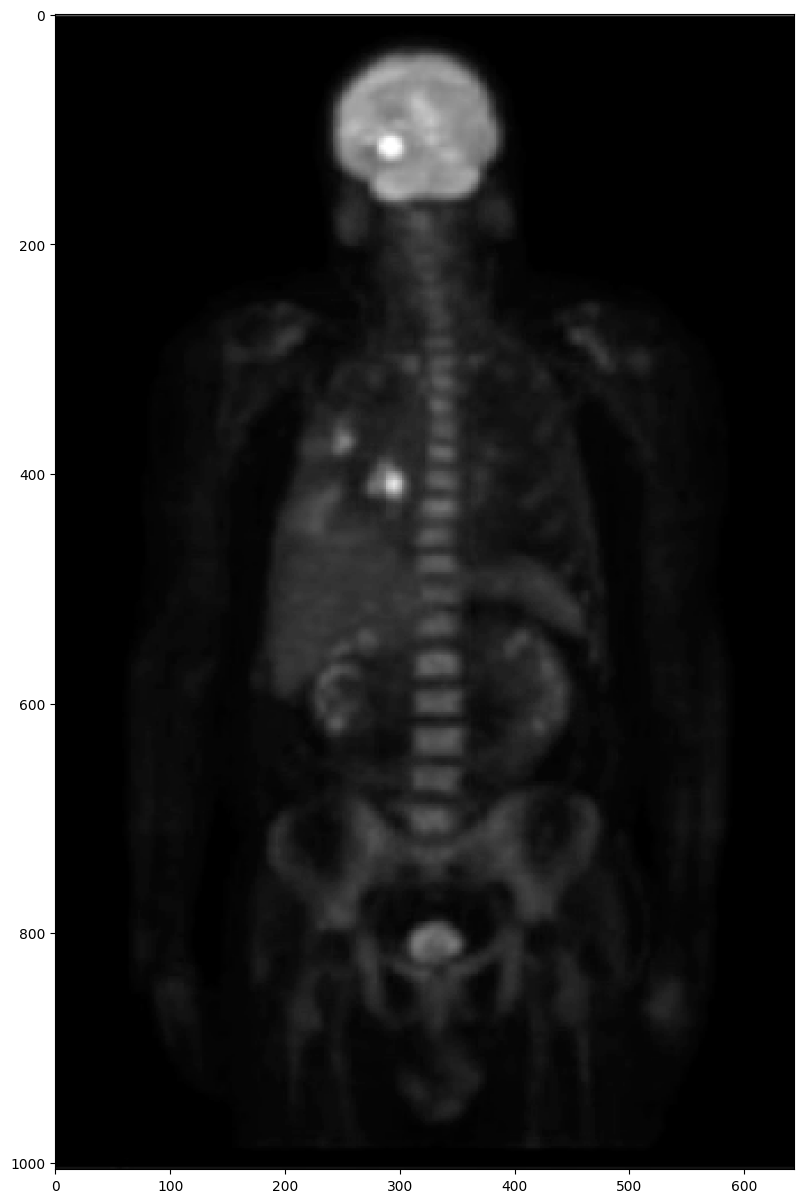

In [ ]:
X = cv2.imread('pet.png',0)
plt.figure(figsize=(30,15))
plt.imshow(X,cmap='gray')
plt.show()

In [ ]:
def plot_spectrum(X_ft,centered=True):
    # A logarithmic colormap
    if centered:
      X_ftc = fftshift(X_ft)
    else:
      X_ftc = X_ft
    plt.figure(figsize=(30,15))
    plt.imshow(np.abs(X_ftc), norm=LogNorm(vmin=5))
    plt.colorbar()


In [ ]:
f = X.astype('double')+1

(N,M) = f.shape

P = 2*N
Q = 2*M

gH = 0.5
gL = 0.2
dg = gH-gL

Do  = 2
Do2 = Do**2
c   = 0.5

D2 = np.zeros((P,Q))

H = D2

for u in range(P):
    for v in range(Q):
        D2[u,v] = ((u-P/2)**2+(v-Q/2)**2)

for u in range(P):
    for v in range(Q):
        H[u,v] = dg*(1-np.exp(-c*D2[u,v]/Do2))+gL


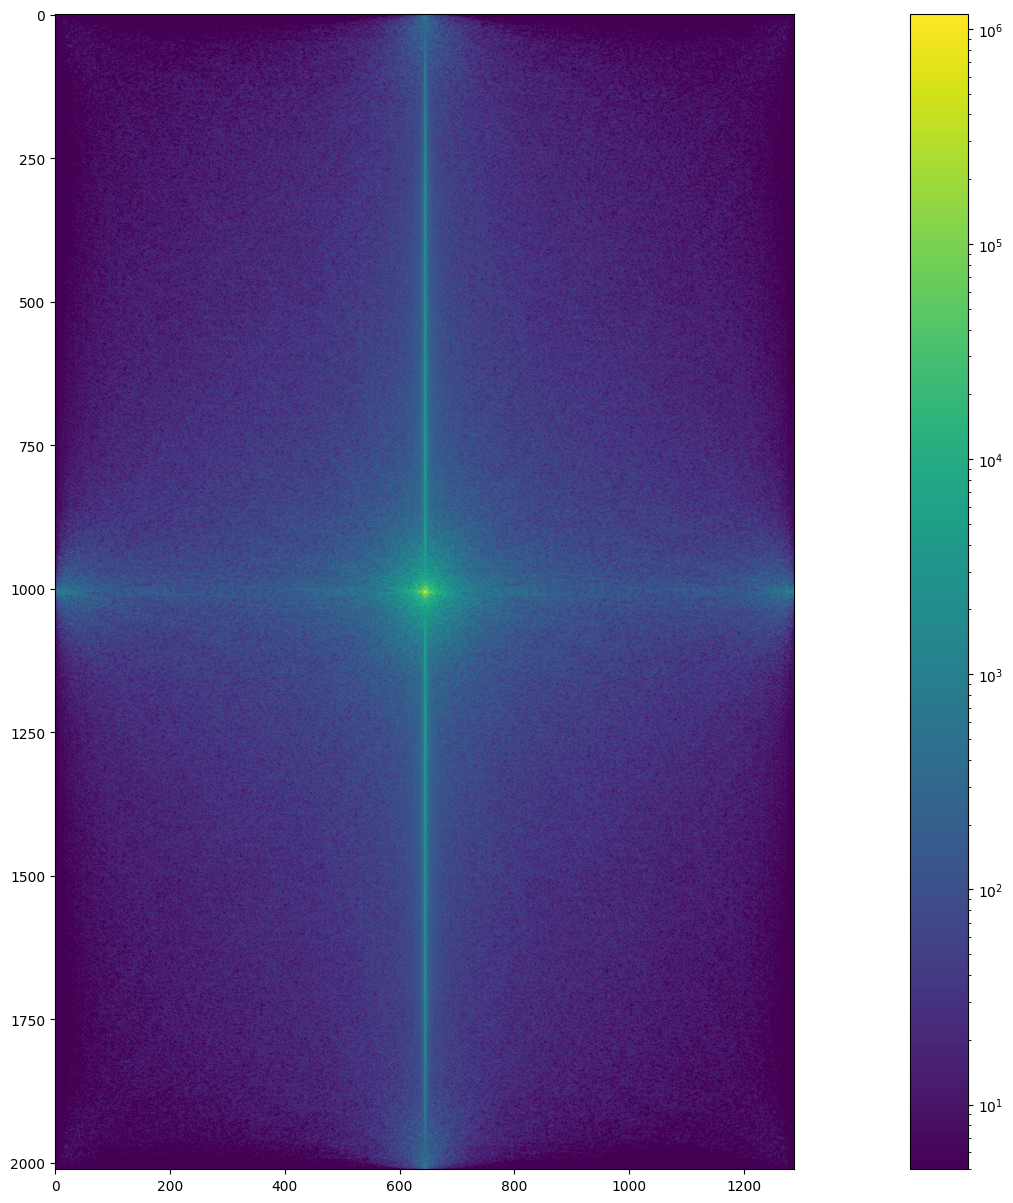

In [ ]:
z = np.log(f)

II = fft2(z, shape=(P,Q), axes=(0, 1))


# Shifting
Ipf = fftshift(II)

plot_spectrum(Ipf,centered=False)


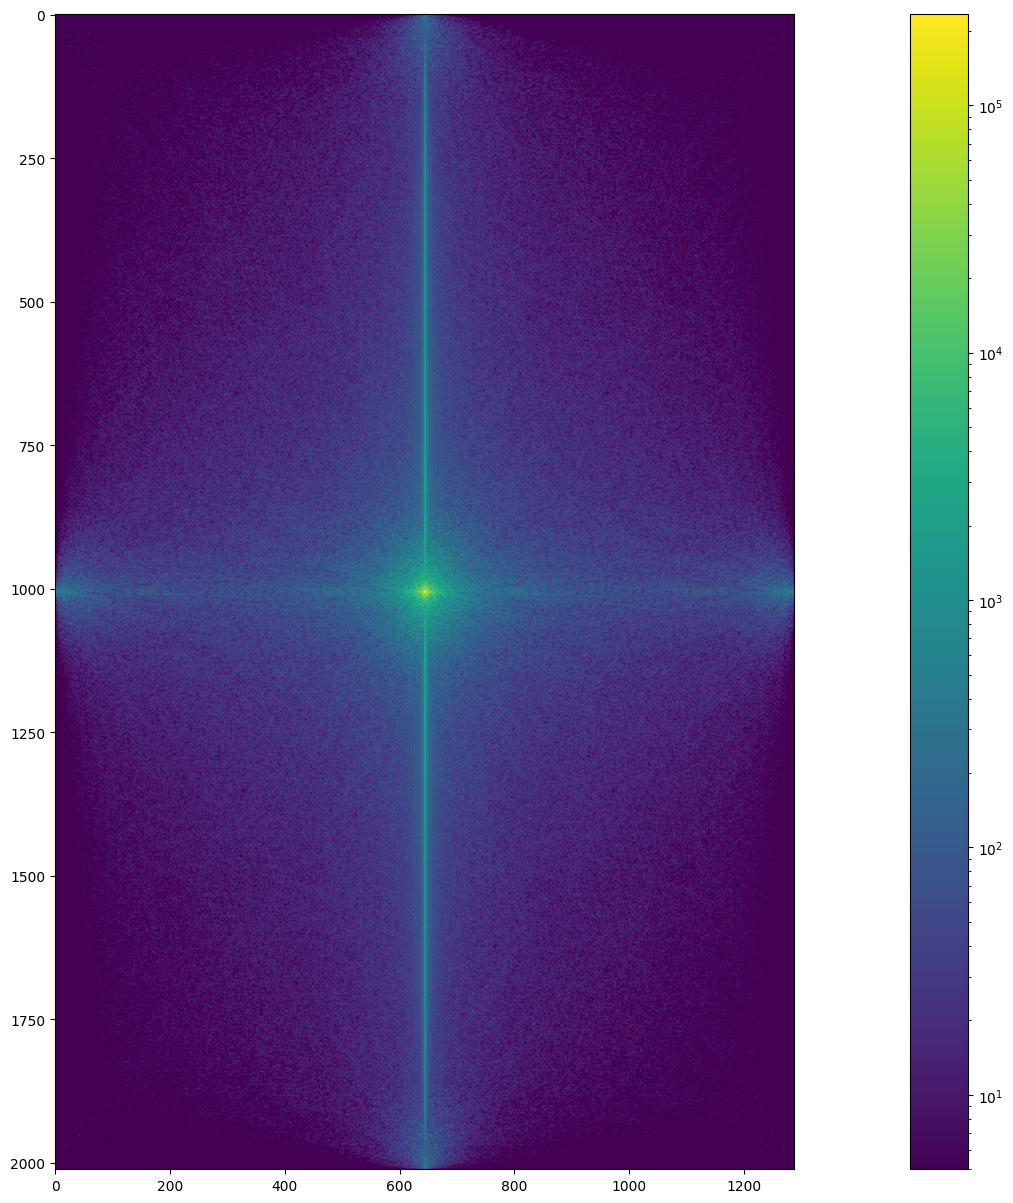

In [ ]:
# Convolution = multiplication in frequency domain
It = H*Ipf

plot_spectrum(It,centered=False)


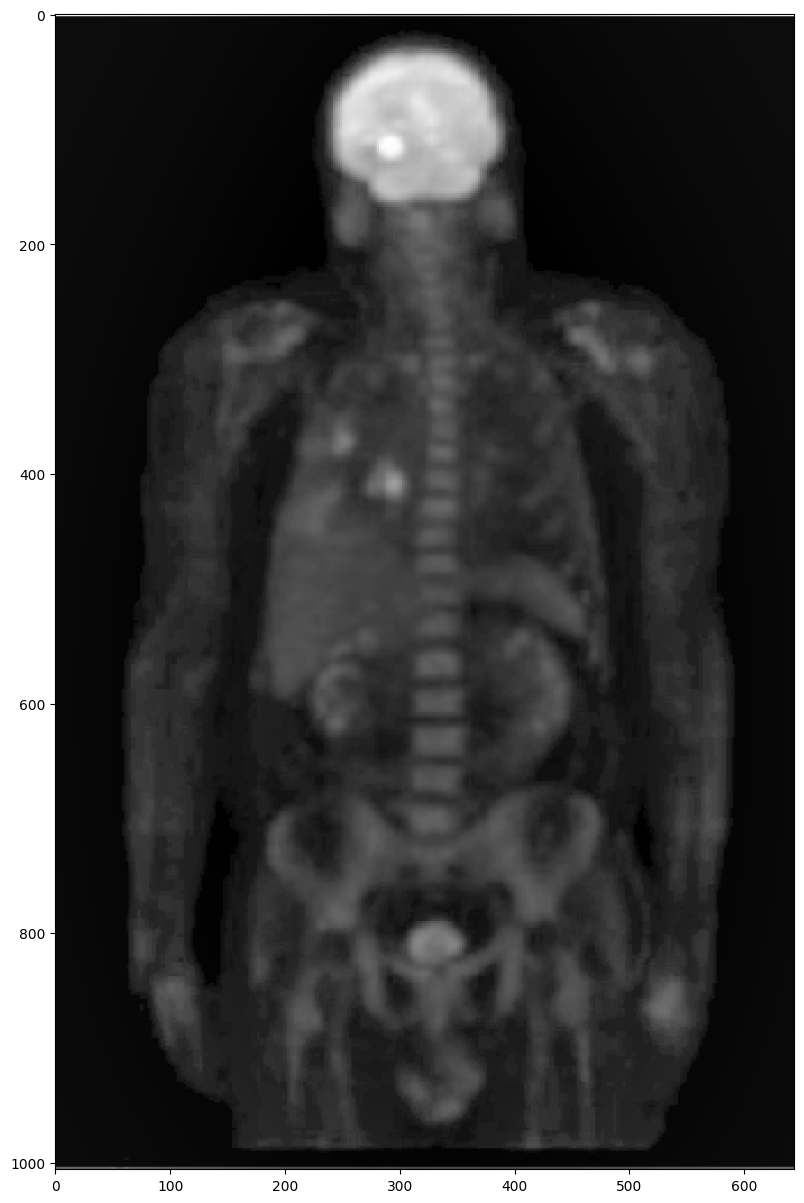

In [ ]:
# Shifting
T = ifftshift(It)

# Inverse Transform
Jp = ifft2(T).real

# Elimination of imaginary part (negligible approx = 0) and
# elimination of part corresponding to zero-padding

s = Jp[0:N,0:M]

#s = s-np.min(s)+1

J = np.exp(s) #/s
J = J-np.min(J)
J = J/np.max(J)*255
plt.figure(figsize=(30,15))
plt.imshow(J,cmap = 'gray')
plt.show()



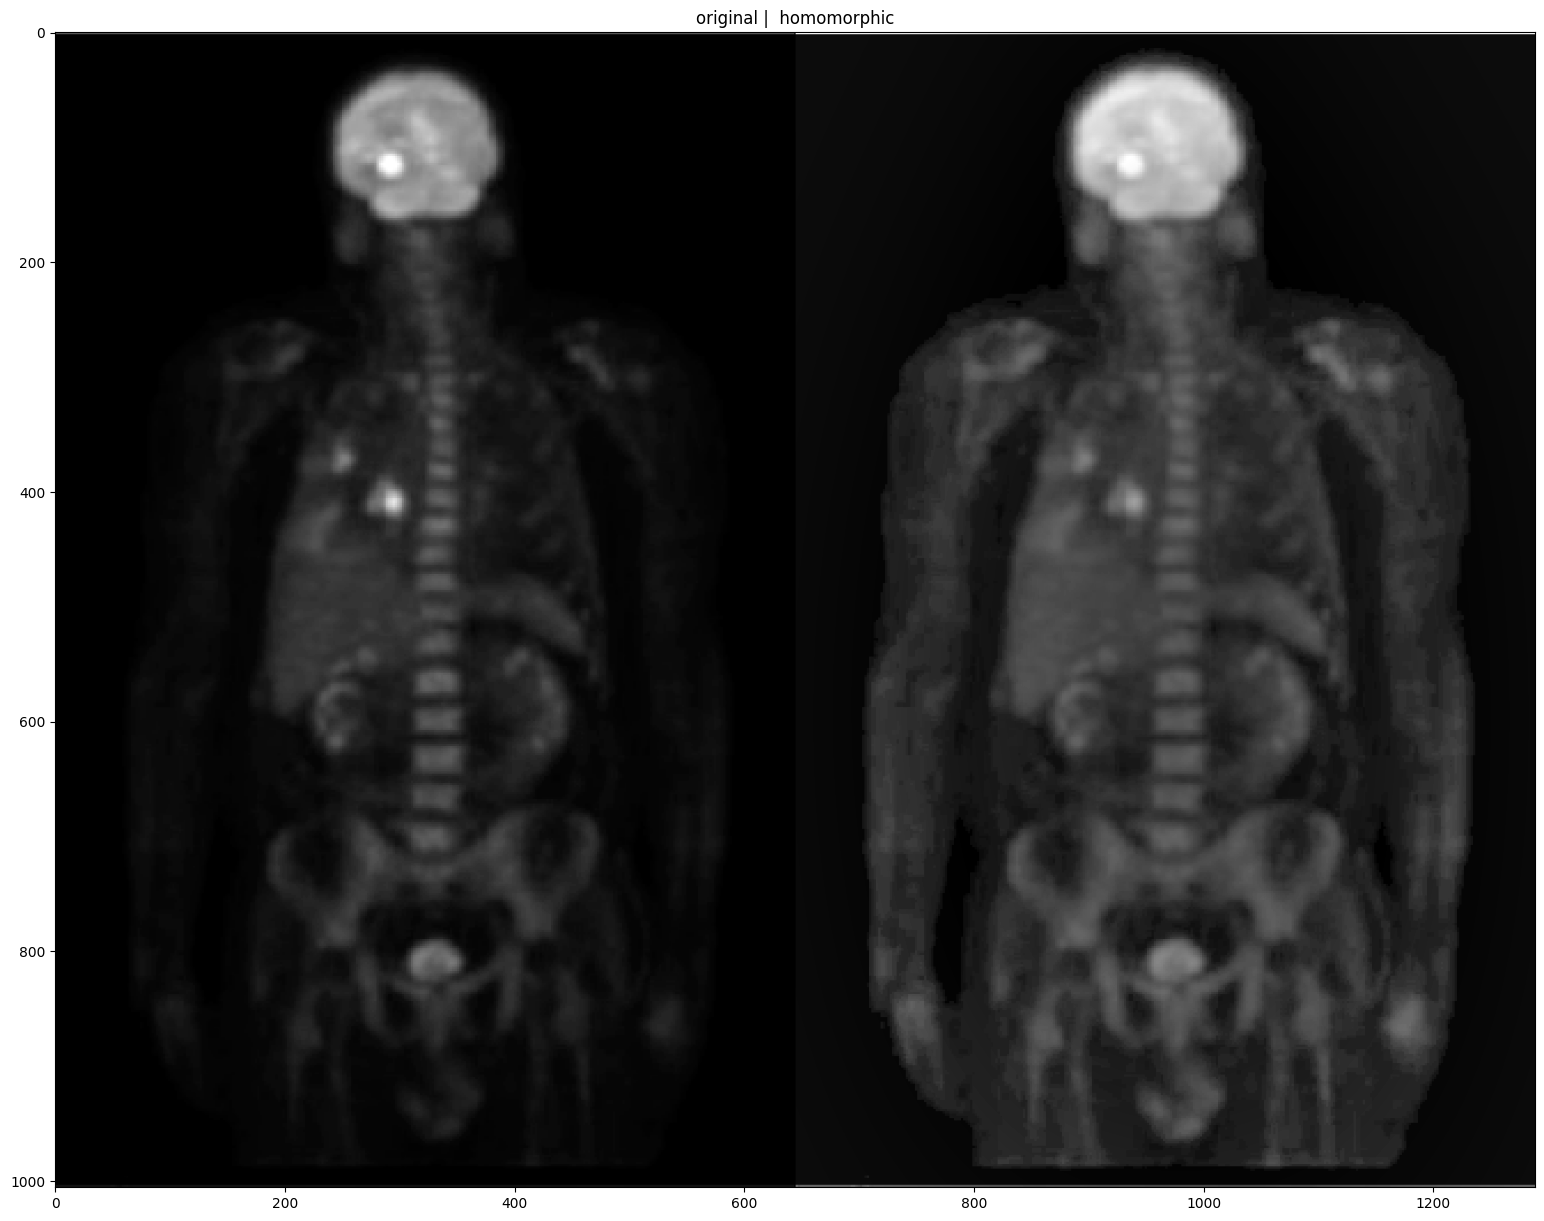

In [ ]:
(N,M) = X.shape
Z = np.hstack([X,np.zeros((N,1)),J])
plt.figure(figsize=(30,15))
plt.imshow(Z, "gray"), plt.title("original |  homomorphic")
plt.show()

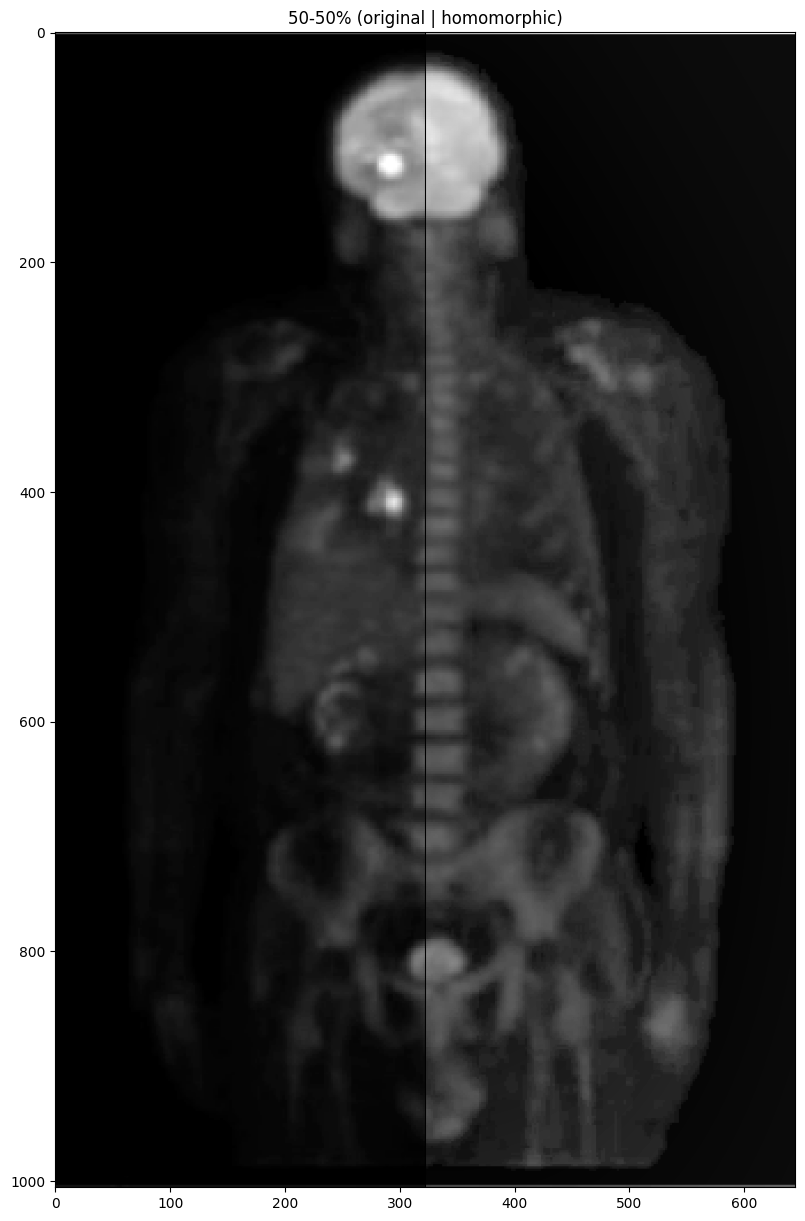

In [ ]:
M2 = int(M/2)
Z = np.hstack([X[:,0:M2],np.zeros((N,1)),J[:,M2:M]])
plt.figure(figsize=(30,15))
plt.imshow(Z, "gray"), plt.title("50-50% (original | homomorphic)")
plt.show()